# Classifier for Simpsons Scripts

## The purpose of this Jupyter Notebook is to extract character scripts from the TV show 'The Simpsons' and convert them into .csv files for analysis.

- First, we download the classifiers we will use from Hugging Face to check that everything is working fine.

In [1]:
import tensorflow as tf
import torch
from transformers import pipeline
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\ltf-g\anaconda3\envs\env_the_simpsons\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 787.7 kB/s eta 0:00:03
   -------------------- ------------------- 0.9/1.7 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### Binomial Classifier
#### The `classifier_binomial` is a text classifier designed to detect whether a given line has a positive or negative reaction. It is trained to classify text into binary categories (good or bad reaction).

In [7]:

classifier_binomial = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")


#### Emotion Proportion Classifier
#### The `classifier` with the task "text-classification" and the model "SamLowe/roberta-base-go_emotions" is capable of analyzing the emotional content of a text line and determining the proportion of different emotions detected. This model is based on RoBERTa and is specialized in identifying various emotions present in text data.


In [9]:
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

In [8]:
#Lets try them...
classifier_binomial("you can do it!")

[{'label': 'POSITIVE', 'score': 0.999811589717865}]

In [10]:
#Lets try them...
classifier_binomial(" Bart, you're a little young to be growling at seven foot Chinese ladies.")

[{'label': 'NEGATIVE', 'score': 0.5542227625846863}]

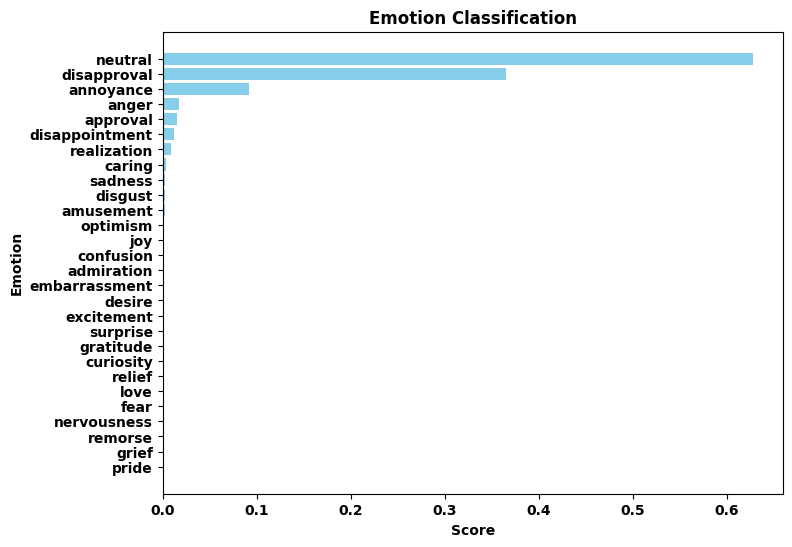

In [12]:
#And now the classifier...

def plot_emotions(model_outputs):
    labels = [output['label'] for output in model_outputs]
    scores = [output['score'] for output in model_outputs]

    plt.figure(figsize=(8, 6))
    plt.barh(labels, scores, color='skyblue')
    plt.xlabel('Score')
    plt.ylabel('Emotion')
    plt.title('Emotion Classification')
    plt.gca().invert_yaxis() 
    plt.show()

sentences = ["Dad, you can't eat all those free samples"]  # test line

model_outputs = classifier(sentences)  # call the clasifier
plot_emotions(model_outputs[0])  # plot the result

- Ok now we get ready de script to work with it!

In [4]:
#Now we bring the script lines.
script_lines = pd.read_csv(r"C:\Users\ltf-g\Desktop\proyecto\simpsons_emotions_scripts\cvs_files\script_lines.csv")
script_lines.head(2)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,emotional_id,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,number_in_series,number_in_season,season
0,86263,298,245,"Seymour Skinner: I'm sorry, everyone. I perpet...",1153000,True,86263.0,3.0,4.0,Seymour Skinner,Auditorium,"I'm sorry, everyone. I perpetrated this charad...",im sorry everyone i perpetrated this charade t...,34.0,298,7,14
1,86264,298,246,Audience: Awwww...,1165000,True,86264.0,321.0,4.0,Audience,Auditorium,Awwww...,awwww,1.0,298,7,14


In [6]:
# will make en 'emotional_id'  only for the moments when 'normalized_text' is not null because is the one that we will process later on
emotional_ids = script_lines.loc[~script_lines['normalized_text'].isnull(), 'id']

# And leave it next to 'speaking_line' column
column_index = script_lines.columns.get_loc('speaking_line') + 1
script_lines.insert(column_index, 'emotional_id', emotional_ids)
script_lines.head(2)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,emotional_id,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,number_in_series,number_in_season,season
0,86263,298,245,"Seymour Skinner: I'm sorry, everyone. I perpet...",1153000,True,86263.0,3.0,4.0,Seymour Skinner,Auditorium,"I'm sorry, everyone. I perpetrated this charad...",im sorry everyone i perpetrated this charade t...,34.0,298,7,14
1,86264,298,246,Audience: Awwww...,1165000,True,86264.0,321.0,4.0,Audience,Auditorium,Awwww...,awwww,1.0,298,7,14


In [19]:
#Now we make a new clean DF
clean_script_lines = script_lines[~script_lines['normalized_text'].isnull()]
[clean_script_lines['normalized_text'].isnull()]
clean_script_lines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132078 entries, 0 to 158265
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  132078 non-null  int64  
 1   episode_id          132078 non-null  int64  
 2   number              132078 non-null  int64  
 3   raw_text            132078 non-null  object 
 4   timestamp_in_ms     132078 non-null  int64  
 5   speaking_line       132078 non-null  bool   
 6   emotional_id        132078 non-null  float64
 7   character_id        132076 non-null  float64
 8   location_id         131701 non-null  float64
 9   raw_character_text  132076 non-null  object 
 10  raw_location_text   131701 non-null  object 
 11  spoken_words        132078 non-null  object 
 12  normalized_text     132078 non-null  object 
 13  word_count          132078 non-null  float64
 14  number_in_series    132078 non-null  int64  
 15  number_in_season    132078 non-null  in

In [20]:
#lets try a short DF first
short_script_line = clean_script_lines.head(10)
short_script_line.head(2)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,emotional_id,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,number_in_series,number_in_season,season
0,86263,298,245,"Seymour Skinner: I'm sorry, everyone. I perpet...",1153000,True,86263.0,3.0,4.0,Seymour Skinner,Auditorium,"I'm sorry, everyone. I perpetrated this charad...",im sorry everyone i perpetrated this charade t...,34.0,298,7,14
1,86264,298,246,Audience: Awwww...,1165000,True,86264.0,321.0,4.0,Audience,Auditorium,Awwww...,awwww,1.0,298,7,14


In [98]:
#This is the list of emotions for the features of our next DF
emotions = [output['label'] for output in model_outputs[0]]
emotions

['neutral',
 'disapproval',
 'annoyance',
 'disappointment',
 'approval',
 'realization',
 'anger',
 'desire',
 'sadness',
 'excitement',
 'caring',
 'joy',
 'optimism',
 'curiosity',
 'amusement',
 'confusion',
 'admiration',
 'surprise',
 'disgust',
 'relief',
 'embarrassment',
 'love',
 'fear',
 'gratitude',
 'nervousness',
 'grief',
 'remorse',
 'pride']

- Just to let you know, the following code took me a while (5 hours).

In [108]:

# Create an empty DataFrame with emotional columns
emotional_dataframe = pd.DataFrame(columns=['id'] + emotions)

# Define function to process emotions
def process_emotions(text):
    try:
        model_outputs = classifier([text])  # Call classifier with text
        emotions = [output['label'] for output in model_outputs[0]]
        scores = [output['score'] for output in model_outputs[0]]
        return dict(zip(emotions, scores))
    except Exception as e:
        print(f"Error processing emotion for text: {text}")
        print(f"Error message: {e}")
        return {}  # Return an empty dictionary if error occurs

# Apply function to each line of text to get emotion values
for index, row in clean_script_lines.iterrows():                    #<----here we instert the dataframe we will be working with.
    id = row['emotional_id']
    text = row['normalized_text']
    emotion_values = process_emotions(text)
    
    # Fill the corresponding row in emotional_dataframe
    emotional_dataframe.loc[index, 'id'] = id
    for emotion, score in emotion_values.items():
        emotional_dataframe.loc[index, emotion] = score

# Result DataFrame with emotion values
emotional_dataframe


,emotional_id,neutral,disapproval,annoyance,disappointment,approval,realization,anger,desire,sadness,...,disgust,relief,embarrassment,love,fear,gratitude,nervousness,grief,remorse,pride
0,86263,0.01357,0.014384,0.006634,0.03588,0.067097,0.016827,0.005142,0.004853,0.243649,...,0.004861,0.00499,0.008168,0.101742,0.00245,0.023776,0.002164,0.012175,0.594076,0.00564
1,86264,0.594302,0.003356,0.016335,0.007102,0.012534,0.011262,0.00446,0.00188,0.003631,...,0.01542,0.001709,0.005707,0.005331,0.007303,0.001092,0.001702,0.001407,0.000461,0.002112
2,86265,0.085622,0.559732,0.15233,0.034718,0.015766,0.00833,0.051575,0.001721,0.009196,...,0.260533,0.000573,0.009784,0.003832,0.004522,0.001437,0.000811,0.000584,0.001542,0.000366
3,86266,0.69412,0.003042,0.017239,0.00158,0.005241,0.002049,0.006643,0.002157,0.000714,...,0.001321,0.000131,0.000568,0.001211,0.00059,0.000465,0.000277,0.00023,0.000304,0.000062
4,86267,0.898732,0.022646,0.015958,0.002051,0.093045,0.008849,0.00594,0.000923,0.001097,...,0.001126,0.00108,0.000465,0.001695,0.000539,0.003134,0.000203,0.000344,0.000387,0.000898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158261,86255,0.961361,0.002824,0.011851,0.002462,0.007989,0.004896,0.003309,0.000916,0.00116,...,0.001677,0.000238,0.000672,0.000528,0.001017,0.000677,0.0003,0.000278,0.000278,0.000238
158262,86256,0.969088,0.002937,0.006316,0.002924,0.010228,0.005539,0.003394,0.001371,0.002389,...,0.002444,0.000365,0.000828,0.001799,0.001815,0.000922,0.000462,0.000539,0.000392,0.000396
158263,86257,0.887082,0.002012,0.055815,0.002847,0.008252,0.003439,0.024117,0.003216,0.002056,...,0.002975,0.000474,0.001078,0.000775,0.001869,0.000795,0.000766,0.000387,0.000365,0.000347
158264,86258,0.027578,0.029473,0.013842,0.078581,0.013795,0.023137,0.004421,0.003198,0.285691,...,0.003784,0.001825,0.026064,0.004221,0.001439,0.006322,0.003081,0.004588,0.747361,0.000532


In [109]:
# Save the DataFrame as CSV
emotional_dataframe.to_csv(r'C:\Users\ltf-g\Desktop\proyecto\simpsons_emotions_scripts\cvs_files\emotional_dataframe.csv', index=False)

In [110]:
means = emotional_dataframe.drop(columns=['emotional_id']).mean()
means

neutral           0.579236
disapproval       0.037836
annoyance          0.03853
disappointment     0.01992
approval          0.064308
realization       0.019372
anger             0.019088
desire            0.013919
sadness           0.024151
excitement         0.01802
caring            0.019347
joy               0.022262
optimism          0.013831
curiosity         0.034029
amusement          0.01253
confusion           0.0237
admiration         0.04595
surprise          0.013233
disgust           0.008057
relief            0.002434
embarrassment     0.003411
love              0.017914
fear               0.00863
gratitude         0.018374
nervousness        0.00245
grief             0.001241
remorse           0.009728
pride             0.001765
dtype: object

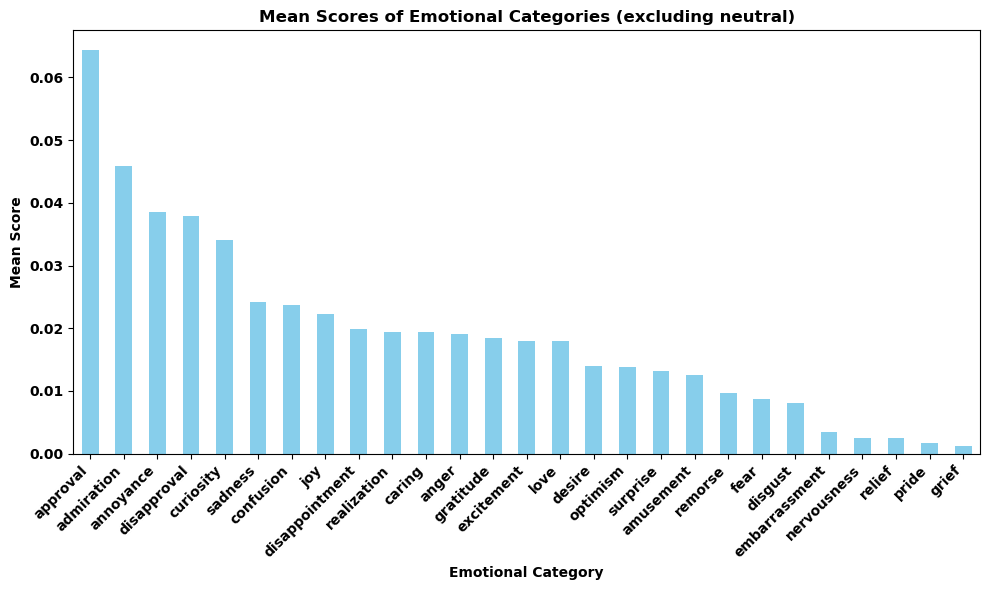

In [116]:
#Now we will plot the mean values to check the proportion of emotions in the show.

emotional_dataframe_filtered = emotional_dataframe.drop(columns=['neutral'])

means = emotional_dataframe_filtered.drop(columns=['emotional_id']).mean()

means_sorted = means.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
means_sorted.plot(kind='bar', color='skyblue')
plt.title('Mean Scores of Emotional Categories (excluding neutral)')
plt.xlabel('Emotional Category')
plt.ylabel('Mean Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### Now we are going to try the other model

In [24]:
short_script_line.head(2)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,emotional_id,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,number_in_series,number_in_season,season
0,86263,298,245,"Seymour Skinner: I'm sorry, everyone. I perpet...",1153000,True,86263.0,3.0,4.0,Seymour Skinner,Auditorium,"I'm sorry, everyone. I perpetrated this charad...",im sorry everyone i perpetrated this charade t...,34.0,298,7,14
1,86264,298,246,Audience: Awwww...,1165000,True,86264.0,321.0,4.0,Audience,Auditorium,Awwww...,awwww,1.0,298,7,14


In [12]:
# Filter script_lines to include only rows where 'normalized_text' is not NaN
text_lines_df = script_lines[script_lines['normalized_text'].notna()]

text_lines_df = text_lines_df[text_lines_df['character_id'].notna()]

text_lines_df = text_lines_df[['emotional_id', 'normalized_text']]

text_lines_df.reset_index(drop=True, inplace=True)
text_lines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132076 entries, 0 to 132075
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   emotional_id     132076 non-null  float64
 1   normalized_text  132076 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
### This code also took a long time.
binomial_df = pd.DataFrame(classifier_binomial(text_lines_df['normalized_text'].tolist())) 

In [101]:
binomial_result = pd.concat([text_lines_df, binomial_df], axis=1)

def calculate_positive_result(row):
    if row['label'] == 'POSITIVE':
        return row['score']
    elif row['label'] == 'NEGATIVE':
        return 1 - row['score']
    else:
        return None 


binomial_result['positive_result'] = binomial_result.apply(calculate_positive_result, axis=1)

binomial_result

,emotional_id,normalized_text,label,score,positive_result
0,86263.0,im sorry everyone i perpetrated this charade t...,POSITIVE,0.998435,0.998435
1,86264.0,awwww,NEGATIVE,0.982339,0.017661
2,86265.0,seymour your feelings are ugly and wrong,NEGATIVE,0.998243,0.001757
3,86266.0,are you gonna listen to her,POSITIVE,0.997690,0.997690
4,86267.0,not on your life reverend from now on im my ow...,NEGATIVE,0.997298,0.002702
...,...,...,...,...,...
132071,86255.0,and now bart simpson will ask a question to hi...,POSITIVE,0.950458,0.950458
132072,86256.0,w-u-w-h-a-a-t w-w-wuh h-h-huh,NEGATIVE,0.994270,0.005730
132073,86257.0,hurry up son,NEGATIVE,0.998636,0.001364
132074,86258.0,im sorry i cant read mrs krabappel never taugh...,NEGATIVE,0.997944,0.002056


In [104]:
# Save the DataFrame as CSV
binomial_result.to_csv(r'C:\Users\ltf-g\Desktop\proyecto\simpsons_emotions_scripts\cvs_files\emotional_binomial_result.csv', index=False)